## Imports

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

## Getting the data ready to be analized

In [58]:
spanish_language_knowledge_df = pd.read_json('../../wikidump/output_language_refactored/eswiki_20210201_refactored_language_dataset.json.gz', compression='gzip', lines=True)
# spanish_language_knowledge_df.head()

Number of rows and columns

In [59]:
spanish_language_knowledge_df.shape

(14835, 5)

Info about the datatype of the Pandas dataframe

In [60]:
spanish_language_knowledge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      14835 non-null  int64 
 1   name                    14835 non-null  object
 2   languages               14835 non-null  object
 3   edit_date               14835 non-null  object
 4   num_languages_declared  14835 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 579.6+ KB


Basic stats

In [61]:
spanish_language_knowledge_df.describe()

,id,num_languages_declared
count,1.483500e+04,14835.000000
mean,3.338898e+06,3.311223
std,2.836710e+06,1.930959
min,3.584000e+03,1.000000
25%,7.928225e+05,2.000000
50%,2.375317e+06,3.000000
75%,5.488544e+06,4.000000
max,9.778426e+06,53.000000


Exploding the languages array into something more readable

In [62]:
spanish_languages_refactored_df = list()
# iterating over the previous dataset
for i, row in spanish_language_knowledge_df.iterrows():
    # explicit the language and the knowledge, a line for each occurrence in languages list
    for el in row['languages']:
        new_row = row
        new_row = new_row.drop('languages')
        new_row['language'] = el['lang']
        new_row['level'] = el['level']
        spanish_languages_refactored_df.append(new_row)
# build a new dataset
spanish_languages_refactored_df = pd.DataFrame(spanish_languages_refactored_df).reset_index(drop=True)
# spanish_languages_refactored_df.head()

Number of elements in the dataset

In [63]:
spanish_languages_refactored_df.shape

(49418, 6)

Some info about the datatypes

In [64]:
spanish_languages_refactored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49418 entries, 0 to 49417
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      49418 non-null  int64 
 1   name                    49418 non-null  object
 2   edit_date               49418 non-null  object
 3   num_languages_declared  49418 non-null  int64 
 4   language                49418 non-null  object
 5   level                   49418 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


Basic stats

In [65]:
spanish_languages_refactored_df.describe()

,id,num_languages_declared,level
count,4.941800e+04,49418.000000,49418.000000
mean,3.364962e+06,4.433324,3.333644
std,2.853922e+06,3.318637,2.066713
min,3.584000e+03,1.000000,0.000000
25%,7.851380e+05,3.000000,1.000000
50%,2.402440e+06,4.000000,3.000000
75%,5.587456e+06,5.000000,6.000000
max,9.778426e+06,53.000000,6.000000


### Data cleaning

Null values

In [66]:
spanish_languages_refactored_df.isnull().sum()

id                        0
name                      0
edit_date                 0
num_languages_declared    0
language                  0
level                     0
dtype: int64

Count all not null values

In [67]:
spanish_languages_refactored_df.notnull().sum()

id                        49418
name                      49418
edit_date                 49418
num_languages_declared    49418
language                  49418
level                     49418
dtype: int64

### Basic plots

## Show the language occurrences specifications

Language and the associated count (the level associated should be greater than 0)

In [68]:
most_declared_languages = spanish_languages_refactored_df.loc[spanish_languages_refactored_df['level'] > 0,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
most_declared_languages.head()

,language,count
112,spanish,13225
30,english,13069
37,french,5007
42,german,2870
59,italian,2354


In [69]:
most_declared_languages.shape

(136, 2)

In [70]:
most_declared_languages.describe()

,count
count,136.000000
mean,350.066176
std,1672.563644
min,1.000000
25%,2.000000
50%,9.000000
75%,54.750000
max,13225.000000


occurrences bar graph

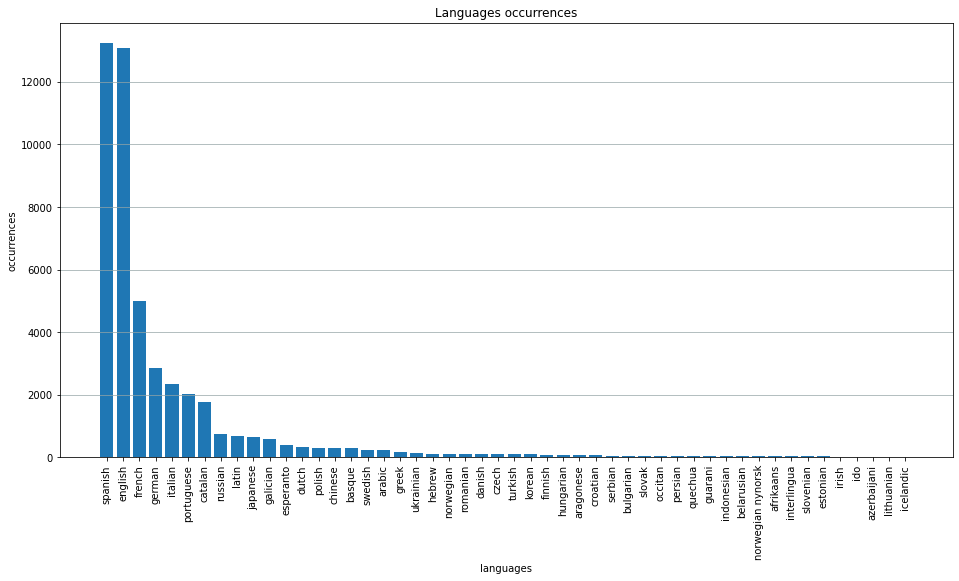

In [71]:
first_fifty = most_declared_languages[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

#### Pie chart of the languages with the greatest number of occurrences

The 6 most known languages compared to the other

In [72]:
split_index = 6
most_declared_languages_six = most_declared_languages[:split_index]
other = most_declared_languages[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
most_declared_languages_six = most_declared_languages_six.append(other, ignore_index = True)
most_declared_languages_six

,language,count
0,spanish,13225
1,english,13069
2,french,5007
3,german,2870
4,italian,2354
5,portuguese,2012
6,other,9072


Plot a pie chart

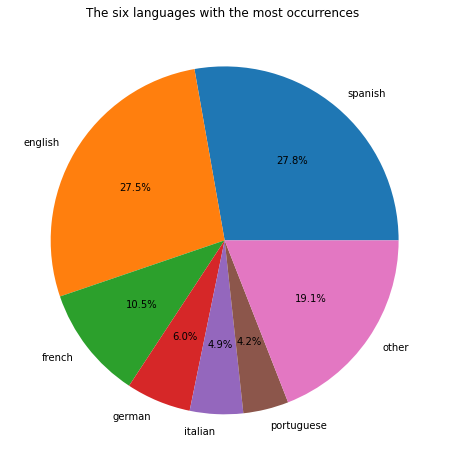

In [73]:
plt.figure(figsize=(16,8))
plt.pie(most_declared_languages_six['count'], labels=most_declared_languages_six['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences ')
plt.show()

Occurrences

In [74]:
occurrences = spanish_languages_refactored_df.groupby(['language', 'level']).size().to_frame('count').reset_index().set_index(['language', 'level']).sort_values('count', ascending=False) 
occurrences.head()

count
language level       
spanish  6      10279
english  3       5036
         2       3623
french   1       2055
english  4       1789

Simple bar chart

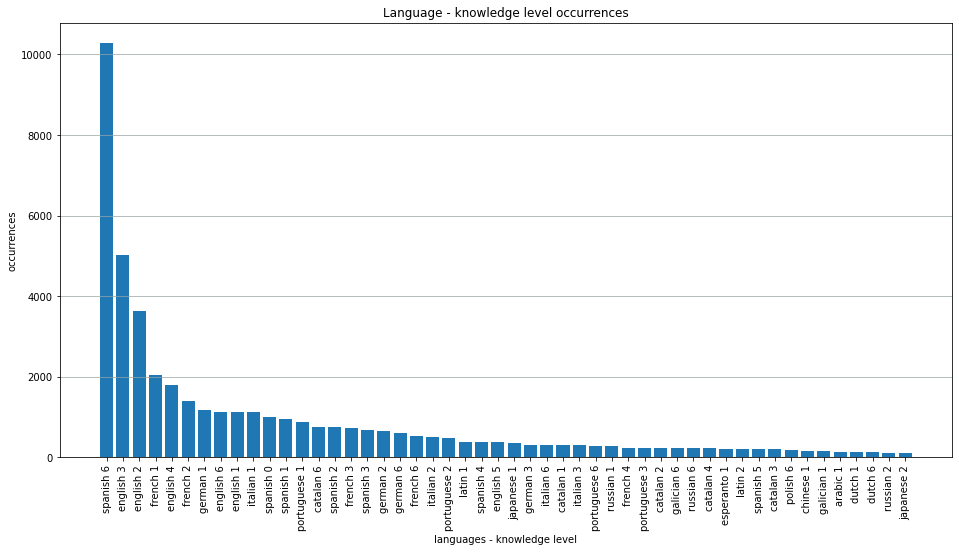

In [75]:
first_fifty = occurrences[:50]
labels = [ ' '.join([str(value[0]), str(value[1])]) for value in first_fifty.index.values ]
plt.figure(figsize=(16,8))
plt.bar(labels, first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Language - knowledge level occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages - knowledge level')
plt.show()

## Bar chart of means

In [76]:
means = spanish_languages_refactored_df.groupby(['language'])['level'].mean().to_frame('mean').reset_index().sort_values('mean', ascending=False)
means.head()

,language,mean
127,uighur,6.0
87,nepali,6.0
52,igbo,6.0
121,telugu,6.0
120,tatar,6.0


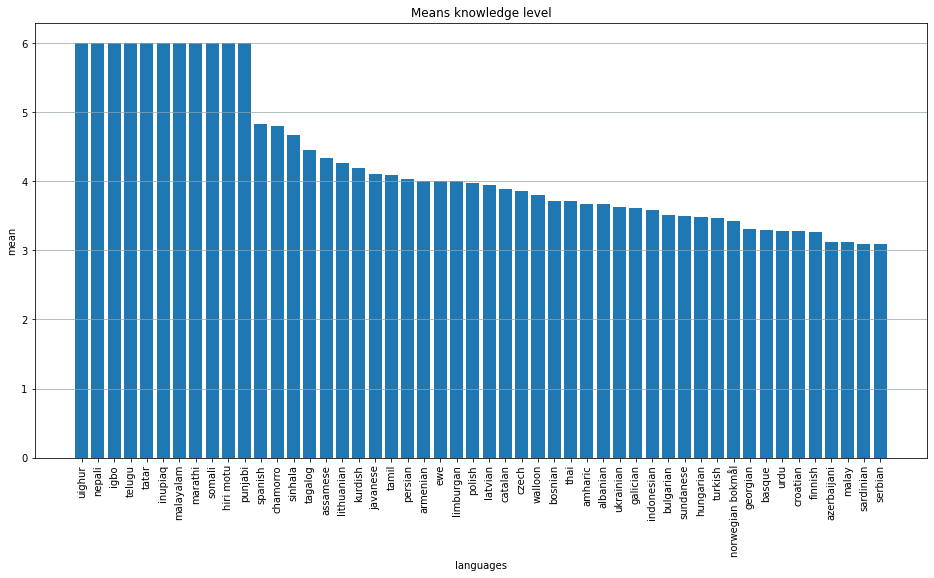

In [77]:
first_fifty = means[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['mean'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Means knowledge level')
plt.ylabel('mean')
plt.xlabel('languages')
plt.show()

## Native speaker analysis

In [78]:
native_speaker = spanish_languages_refactored_df.loc[spanish_languages_refactored_df['level'] == 6,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
native_speaker.head()

,language,count
75,spanish,10279
19,english,1130
11,catalan,759
26,german,606
23,french,524


Dimension

In [79]:
native_speaker.shape

(92, 2)

Bar chart

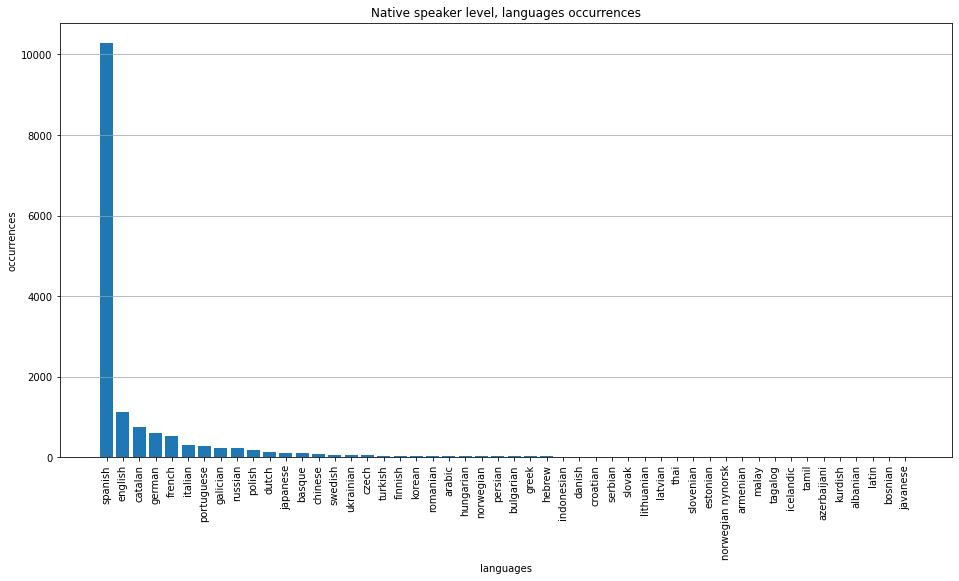

In [80]:
first_fifty = native_speaker[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Native speaker level, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

Retrieve the six most known languages

In [81]:
split_index = 6
most_declared_languages_six = native_speaker[:split_index]
other = native_speaker[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
native_speaker = most_declared_languages_six.append(other, ignore_index = True)
native_speaker

,language,count
0,spanish,10279
1,english,1130
2,catalan,759
3,german,606
4,french,524
5,italian,316
6,other,2217


Pie chart using the six most known languages

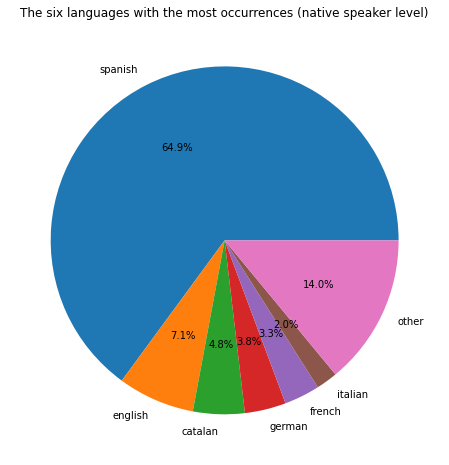

In [82]:
plt.figure(figsize=(16,8))
plt.pie(native_speaker['count'], labels=native_speaker['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (native speaker level)')
plt.show()

## Level 5 language knowledge

In [83]:
level_five = spanish_languages_refactored_df.loc[spanish_languages_refactored_df['level'] == 5,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_five.head()

,language,count
5,english,371
24,spanish,207
6,french,53
8,german,27
3,catalan,25


Dimension

In [84]:
level_five.shape

(27, 2)

Bar chart

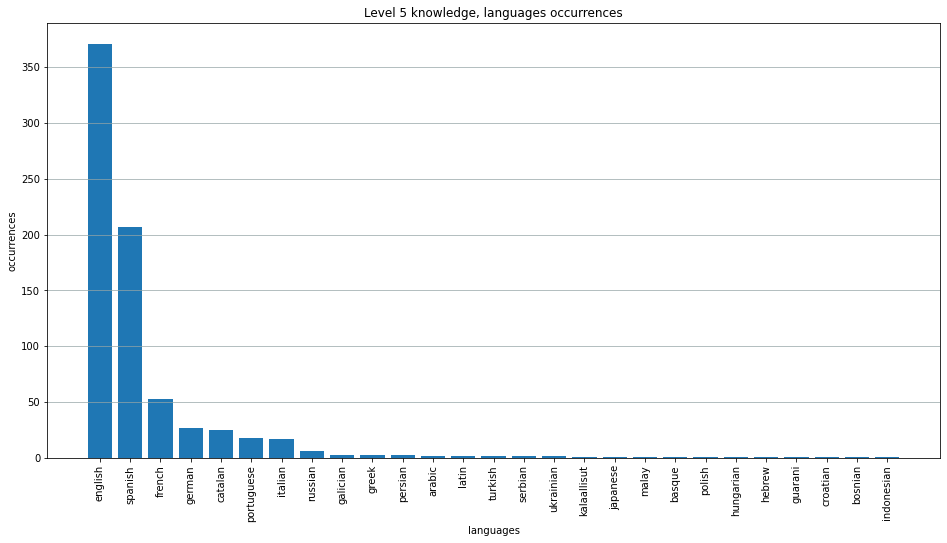

In [85]:
first_fifty = level_five[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 5 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

Retrieve the six languages with the greatest amount of occurrences

In [86]:
split_index = 6
most_declared_languages_six = level_five[:split_index]
other = level_five[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_five = most_declared_languages_six.append(other, ignore_index = True)
level_five

,language,count
0,english,371
1,spanish,207
2,french,53
3,german,27
4,catalan,25
5,portuguese,18
6,other,53


Pie chart

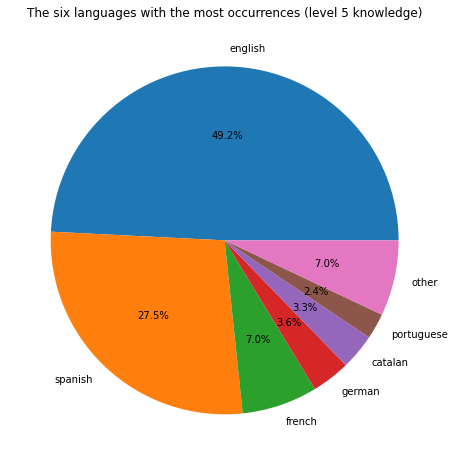

In [87]:
plt.figure(figsize=(16,8))
plt.pie(level_five['count'], labels=level_five['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 5 knowledge)')
plt.show()

## Level 4 language knowledge

In [88]:
level_four = spanish_languages_refactored_df.loc[spanish_languages_refactored_df['level'] == 4,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_four.head()

,language,count
16,english,1789
48,spanish,371
20,french,244
10,catalan,224
24,german,99


In [89]:
level_four.shape

(57, 2)

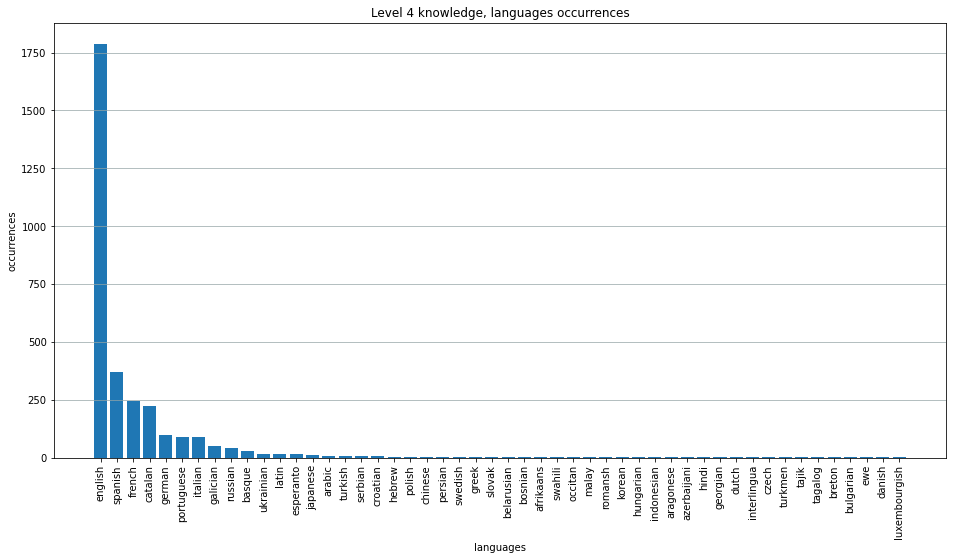

In [90]:
first_fifty = level_four[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 4 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [91]:
split_index = 6
most_declared_languages_six = level_four[:split_index]
other = level_four[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_four = most_declared_languages_six.append(other, ignore_index = True)
level_four

,language,count
0,english,1789
1,spanish,371
2,french,244
3,catalan,224
4,german,99
5,portuguese,91
6,other,370


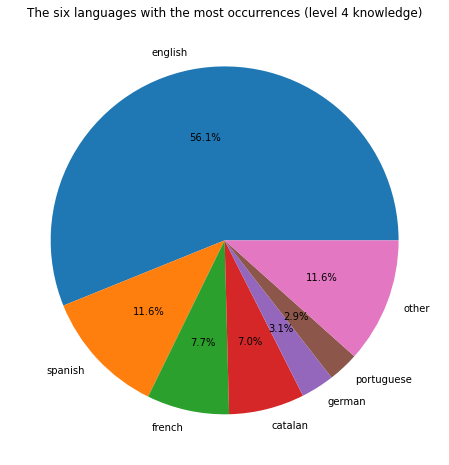

In [92]:
plt.figure(figsize=(16,8))
plt.pie(level_four['count'], labels=level_four['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 4 knowledge)')
plt.show()

## Level 3 language knowledge

In [93]:
level_three = spanish_languages_refactored_df.loc[spanish_languages_refactored_df['level'] == 3,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_three.head()

,language,count
17,english,5036
22,french,738
64,spanish,670
24,german,317
37,italian,301


In [94]:
level_three.shape

(75, 2)

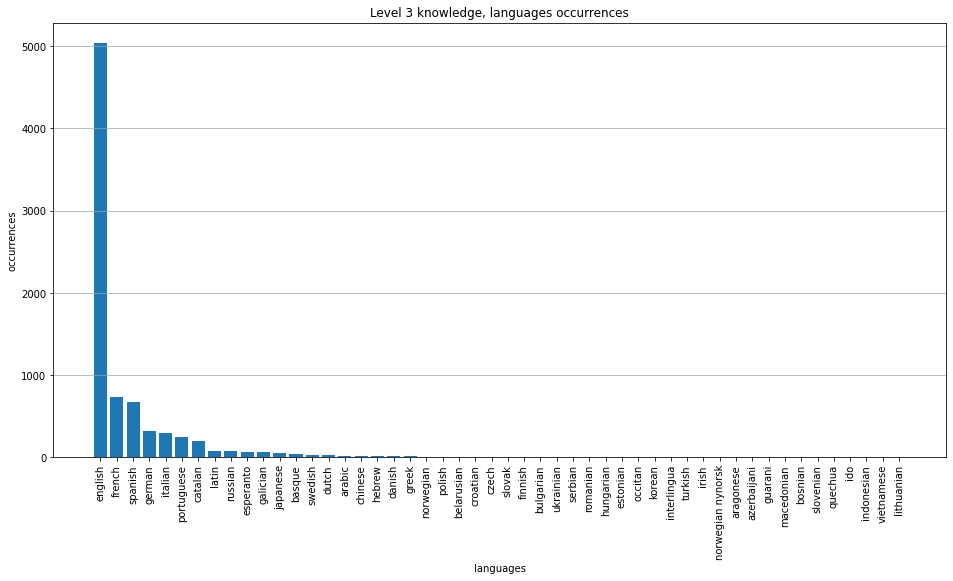

In [95]:
first_fifty = level_three[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 3 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [96]:
split_index = 6
most_declared_languages_six = level_three[:split_index]
other = level_three[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_three = most_declared_languages_six.append(other, ignore_index = True)
level_three

,language,count
0,english,5036
1,french,738
2,spanish,670
3,german,317
4,italian,301
5,portuguese,243
6,other,926


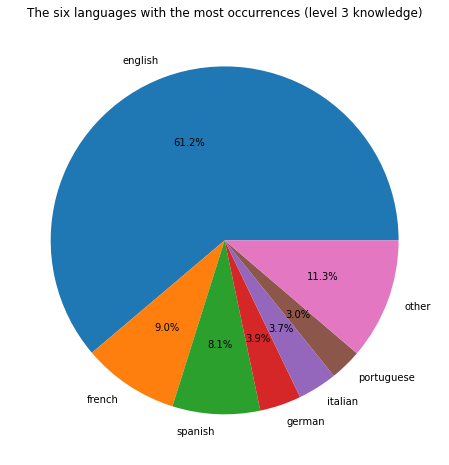

In [97]:
plt.figure(figsize=(16,8))
plt.pie(level_three['count'], labels=level_three['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 3 knowledge)')
plt.show()

## Level 2 language knowledge

In [98]:
level_two = spanish_languages_refactored_df.loc[spanish_languages_refactored_df['level'] == 2,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_two.head()

,language,count
21,english,3623
26,french,1393
73,spanish,749
29,german,654
41,italian,516


In [99]:
level_two.shape

(86, 2)

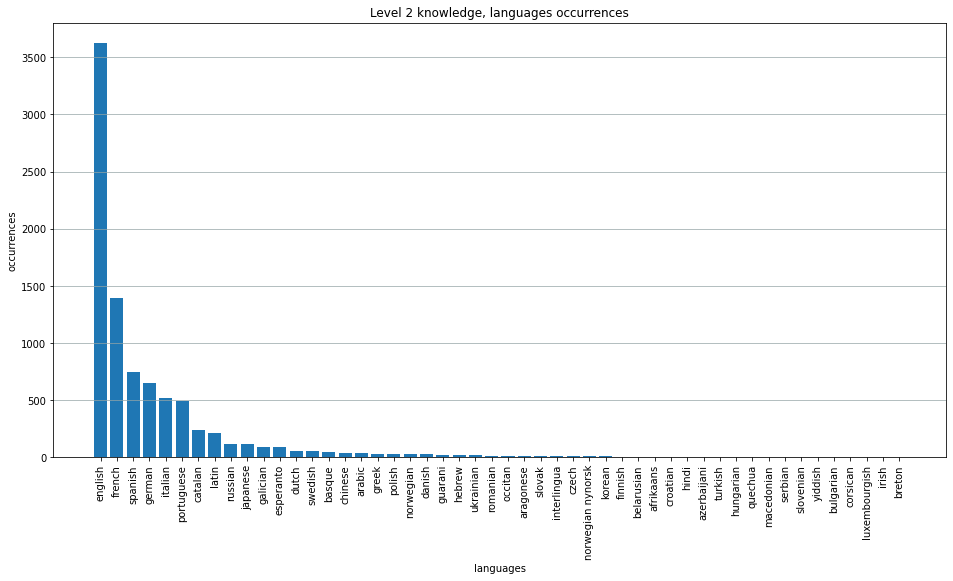

In [100]:
first_fifty = level_two[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 2 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [101]:
split_index = 6
most_declared_languages_six = level_two[:split_index]
other = level_two[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_two = most_declared_languages_six.append(other, ignore_index = True)
level_two

,language,count
0,english,3623
1,french,1393
2,spanish,749
3,german,654
4,italian,516
5,portuguese,490
6,other,1511


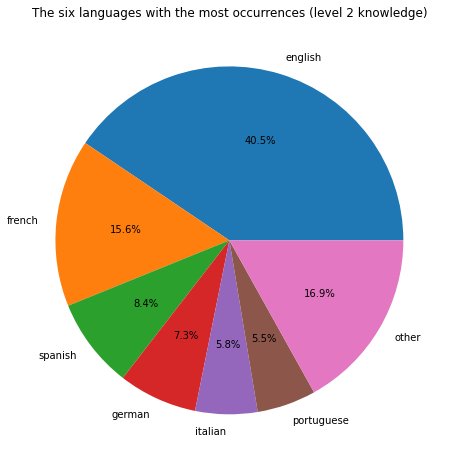

In [102]:
plt.figure(figsize=(16,8))
plt.pie(level_two['count'], labels=level_two['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 2 knowledge)')
plt.show()

## Level 1 language knowledge

In [103]:
level_one = spanish_languages_refactored_df.loc[spanish_languages_refactored_df['level'] == 1,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_one.head()

,language,count
30,french,2055
34,german,1167
25,english,1120
47,italian,1116
89,spanish,949


In [104]:
level_one.shape

(108, 2)

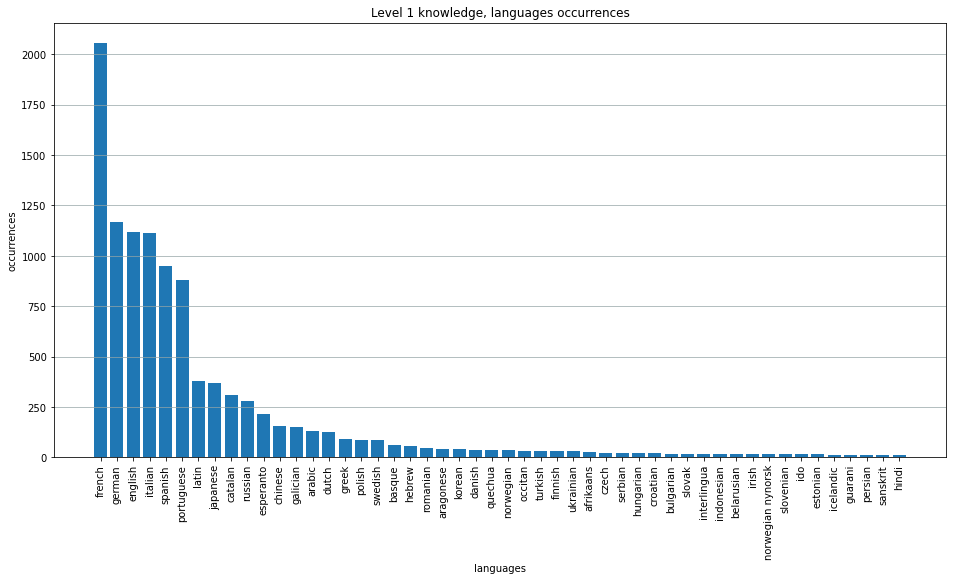

In [105]:
first_fifty = level_one[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 1 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [106]:
split_index = 6
most_declared_languages_six = level_one[:split_index]
other = level_one[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_one = most_declared_languages_six.append(other, ignore_index = True)
level_one

,language,count
0,french,2055
1,german,1167
2,english,1120
3,italian,1116
4,spanish,949
5,portuguese,881
6,other,3381


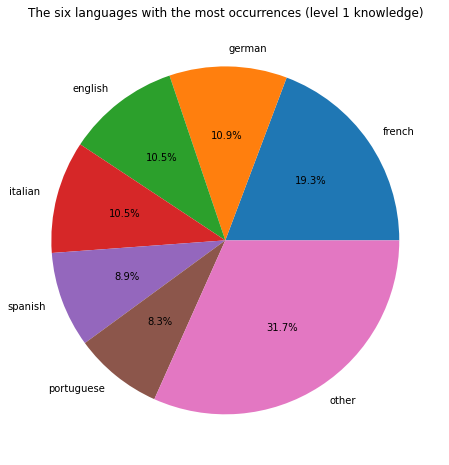

In [107]:
plt.figure(figsize=(16,8))
plt.pie(level_one['count'], labels=level_one['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 1 knowledge)')
plt.show()

## Level 0 language knowledge

In [108]:
level_zero = spanish_languages_refactored_df.loc[spanish_languages_refactored_df['level'] == 0,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_zero.head()

,language,count
68,spanish,1000
26,german,111
22,french,82
39,japanese,65
38,italian,60


In [109]:
level_zero.shape

(84, 2)

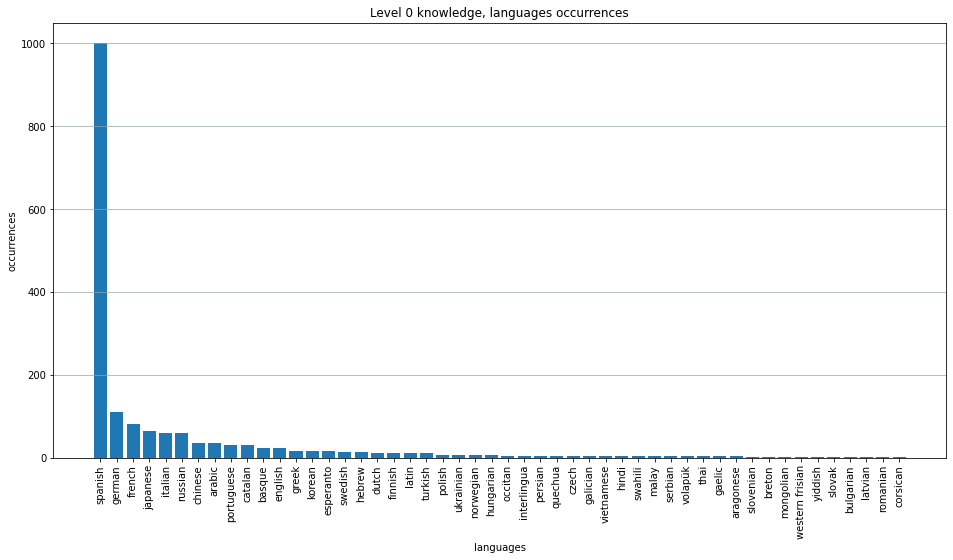

In [110]:
first_fifty = level_zero[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 0 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [111]:
split_index = 6
most_declared_languages_six = level_zero[:split_index]
other = level_zero[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_zero = most_declared_languages_six.append(other, ignore_index = True)
level_zero

,language,count
0,spanish,1000
1,german,111
2,french,82
3,japanese,65
4,italian,60
5,russian,59
6,other,432


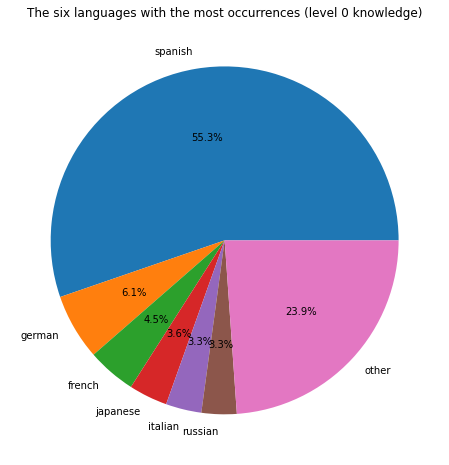

In [112]:
plt.figure(figsize=(16,8))
plt.pie(level_zero['count'], labels=level_zero['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 0 knowledge)')
plt.show()